In [1]:
# 引入Matplotlib引入
from matplotlib import pyplot as plt
import numpy as np

# 一. 改变x轴显示内容xticks方法再次说明

- <font color="red">第一个参数 需要一个数字列表，指示x轴上的记号应该指向哪里,您向这个函数传递了一个字符串，它不知道如何将其转换为x轴上的位置</font>

- 1.x轴是数值型数据

In [2]:
# 日期从1991年到2020 ,30年的日期
dates = np.arange(1991,2021)
dates

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [3]:
# 使用numpy随机生成销量
sales = np.random.randint(50,500,size=30)
sales

array([170, 106,  65, 425, 230, 488, 442, 436, 334, 441, 275, 298, 153,
       353, 442, 148, 233, 320, 235, 474, 375, 197,  58, 468, 371, 286,
       335, 307, 376, 297])

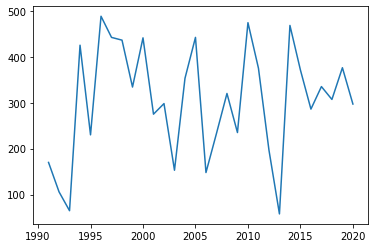

In [4]:
# 绘制销量图:
plt.plot(dates,sales)

> 对于数值型数组,绘图会自动分割.

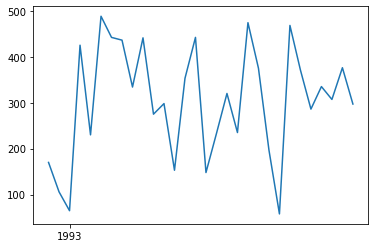

In [5]:
%matplotlib inline
# 如果想按照自己的逻辑分割,注意数值型对应轴上面的数值,比如:
plt.xticks([1980,1982,1993]) # 当前会看到x轴上面没有数据,其实是有数据,只不过,默认当前图形的x轴区间是1991,2021
# 可以借助设置%matplotlib notebook,移动图像来查看
# 绘制销量图:
plt.plot(dates,sales)

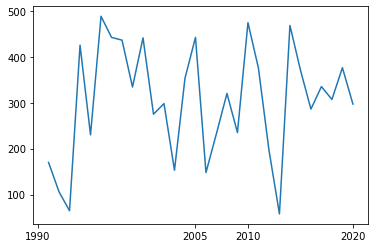

In [6]:
# 如果想按照自己的逻辑分割,注意数值型使用的是元素本身,而不是元素的索引
plt.xticks([1990,2005,2010,2020]) # 元素本身
plt.plot(dates,sales)

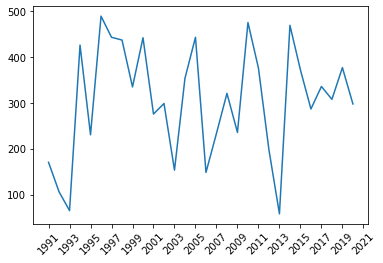

In [7]:
plt.xticks(np.arange(dates.min(),dates.max()+2,2),rotation=45)
# 绘制销量图:
plt.plot(dates,sales)

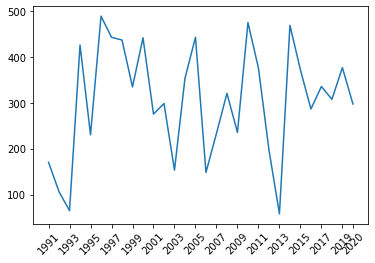

In [8]:
# 如果想安装自己的逻辑分割,注意数值型使用的是元素本身,而不是元素的索引
plt.xticks([dates[i] for i in range(0,len(dates),2)]+[2020],rotation=45) # 元素本身
# 绘制销量图:
plt.plot(dates,sales)

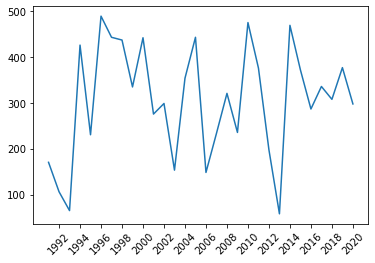

In [9]:
# 如何还是x轴想间隔指定个数
# 1. 将x轴更改为字符串
# 日期从1991年到2020 ,30年的日期
dates = np.arange(1991,2021).astype(np.str_)
# xticks 第一个参数中元素不能我字符串 
plt.xticks(range(1,len(dates),2),rotation=45) # 元素本身
# 绘制销量图:
plt.plot(dates,sales)

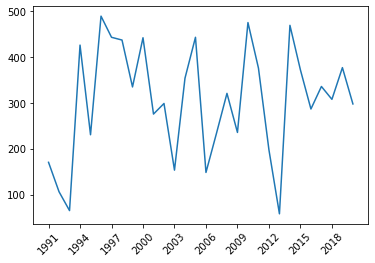

In [10]:
# 如何还是x轴想间隔指定个数
# 1. 将x轴更改为字符串
# 日期从1991年到2020 ,30年的日期
dates = np.arange(1991,2021)
# 间隔取得元素本身
plt.xticks(dates[:-1:3],rotation=45) # 元素本身
# plt.xticks([dates[i] for i in range(0,len(dates),2)],rotation=45) # 元素本身
# 绘制销量图:
#plt.ylim(0,500)
plt.plot(dates,sales)


<font color="red">
# 总结:
    
- x轴是数值型,会按照数值型本身作为x轴的坐标
    
- x轴为字符串类型,会按照索引作为x轴的坐标
</font>

# 例子

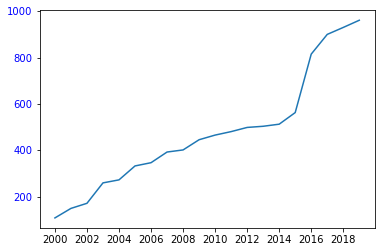

In [11]:
time=np.arange(2000,2020).astype(np.str_)
sales = [109, 150, 172, 260, 273, 333, 347, 393, 402, 446, 466, 481, 499,504, 513, 563, 815, 900, 930, 961]
plt.xticks(range(0,len(time),2))##,labels=['year%s'%i for i in time],rotation=45,color="red")
#plt.xticks(range(0,len(time),2),labels=['year%s'%time[i] for i in range(0,len(time),2)],rotation=45,color="red")
plt.yticks(color="blue")
plt.plot(time,sales)

# 二. 其他元素可视性

### 1. 显示网格:plt.grid()

`plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5",axis = 'x') `

- 显示网格
- linestyle：线型
- color：颜色
- linewidth：宽度
- axis：x，y，both，显示x/y/两者的格网

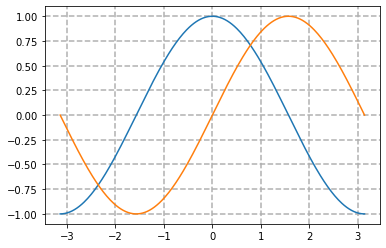

In [12]:
x = np.linspace(-np.pi,np.pi,256,endpoint = True)
c, s = np.cos(x), np.sin(x)
plt.plot(x, c)
plt.plot(x, s)
# 通过ndarry创建图表
#plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5",axis = 'both')
plt.grid(True,linestyle="--",linewidth='1.5',axis='both')
# 显示网格
# linestyle：线型
# color：颜色
# linewidth：宽度  (lw)
# axis：x，y，both，显示x/y/两者的格网

### 2. plt.gca( ) 对坐标轴的操作

首先观察画布上面的坐标轴，如下图
<img src="images/image-20220319000438039.png" style="width:200px">

上图中，用红色标识出的黑色边界框线在Matplotlib中被称为<b>spines</b>，中文翻译为脊柱......在我理解看来，意思是这些边界框线是坐标轴区域的“支柱”。

那么，我们最终要挪动的其实就是这四个“支柱”

且所有的操作均在plt.gca( )中完成，gca就是get current axes的意思

接下来需要绘制图如下:

<img src="./images/image-20220319004154730.png" style="width:600px"/>

- 获取当前坐标轴位置并移动

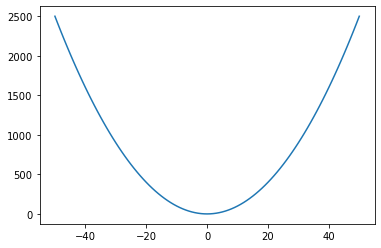

In [13]:
# 创建x轴数据
x = np.arange(-50,51)
# 创建y轴的数据,他是x的平方
y = x ** 2
plt.plot(x, y)

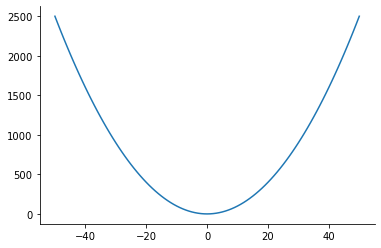

In [14]:
x = np.arange(-50,51)
y = x ** 2
# 获取当前坐标轴
ax = plt.gca()
# 通过坐标轴spines,确定 top, bottom, left, right (分别表示上,下,左和右)

# 不需要右侧和上侧线条,则可以设置他的颜色
ax.spines['right'].set_color("none")
ax.spines['top'].set_color("none")

plt.plot(x, y)

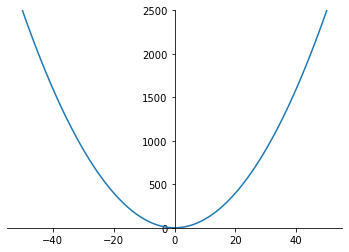

In [15]:
# 分别定义x y
x = np.arange(-50,51)
y = x ** 2
# 获取当前坐标轴
ax = plt.gca()
# 不需要右侧和上侧线条,则可以设置他的颜色
ax.spines['right'].set_color("none")
ax.spines['top'].set_color("none")
# 移动下轴到指定位置
# 在这里，position位置参数有三种，data , outward(向外-可自行尝试) , axes
# axes:0.0 - 1.0之间的值，整个轴上的比例
ax.spines['left'].set_position(('axes',0.5))
# 移动下轴到指定位置
# 'data'表示按数值挪动，其后数字代表挪动到Y轴的刻度值
#ax.spines['bottom'].set_position(('data',0.0))
plt.ylim(0, y.max()) # 设置轴取值范围
plt.plot(x, y)

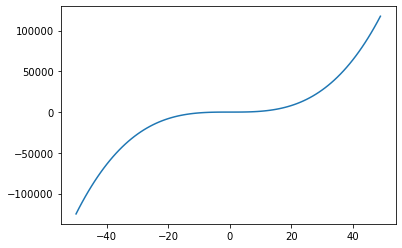

In [16]:
x = np.arange(-50,50)
y = x ** 3

plt.plot(x,y)

# 三. plt.rcParams设置画图的分辨率，大小等信息

- plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size英寸
- plt.rcParams['figure.dpi'] = 300 #分辨率
 - 默认的像素：[6.0,4.0]，分辨率为72，图片尺寸为 432x288
 - 指定dpi=100，图片尺寸为 600*400
 - 指定dpi=300，图片尺寸为 1800*1200

[]

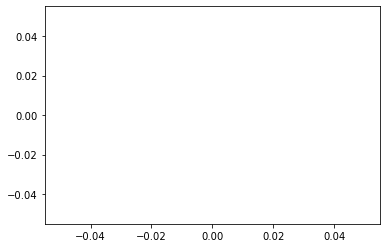

In [17]:
# 分辨率为72，图片尺寸为 432x288
plt.plot() 

[]

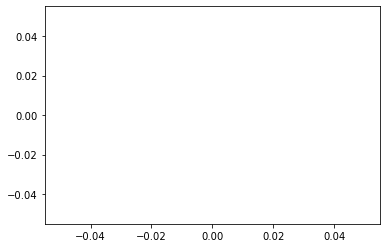

In [18]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot()

In [19]:
# 指定dpi=100，图片尺寸为 600*400
plt.rcParams['figure.dpi'] = 100

[]

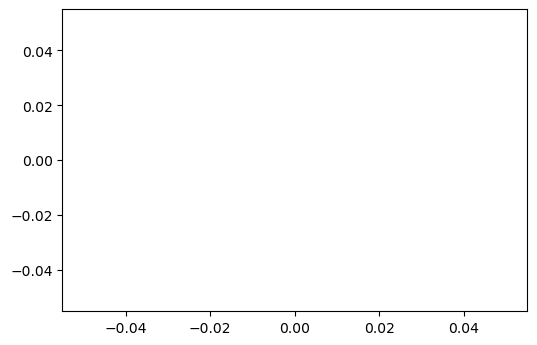

In [20]:
plt.plot()

[]

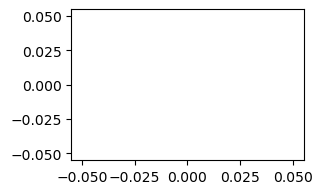

In [21]:
# 设置尺寸
plt.rcParams['figure.figsize']=(3,2)
plt.plot()

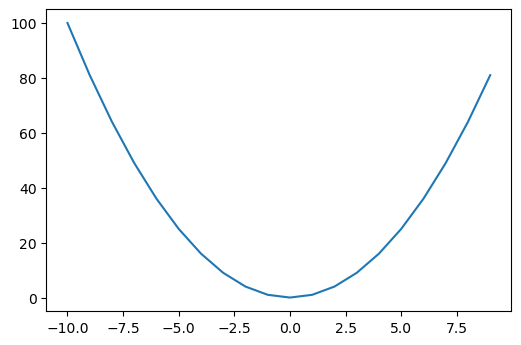

In [22]:
plt.rcParams['figure.figsize']=(6,4)
import numpy as np
#创建x为-10到10的整数
x = np.arange(-10,10)
# y是x的平方
y = x ** 2
plt.plot(x, y)

# 练习 

将上节课的 销量程序的分别率调高,看下轴上面的字体是否清晰

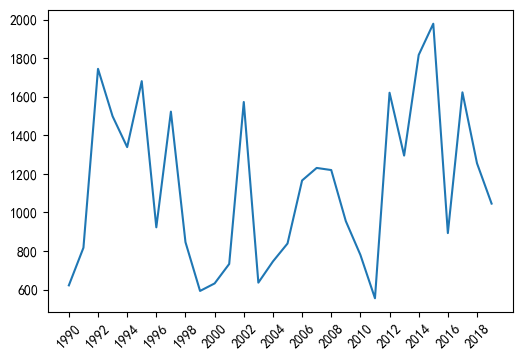

In [23]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 日期
times = np.arange(1990,2020).astype(np.str_)
# 销量
sales = np.random.randint(500,2000,size=len(times))
# 绘图
plt.xticks(range(0,len(times),2),rotation=45)
#设置画布的分辨率大小
# plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['figure.dpi']=100
plt.plot(times,sales)

# 四.图表的样式参数设置


### 1.线条样式

传入x,y，通过plot画图,并设置折线颜色、透明度、折线样式和折线宽度  标记点、标记点大小、标记点边颜色、标记点边宽,网格

`plt.plot(x,y,color='red',alpha=0.3,linestyle='-',linewidth=5,marker='o',markeredgecolor='r',markersize='20',markeredgewidth=10)`

- 1). color:可以使用颜色的16进制，也可以使用线条颜色的英文，还可是使用之前的缩写
    
| 字符  | 颜色 | 英文全称 |
| :----- | :---- |:-------- |
| ‘b’   | 蓝色 | blue     |
| ‘g’   | 绿色 | green    |
| ’ r ’ | 红色 | red      |
| ’ c ’ | 青色 | cyan     |
| ’ m ’ | 品红 | magenta  |
| ’ y ’ | 黄色 | yellow   |
| ’ k ’ | 黑色 | black    |
| ’ w ’ | 白色 | white    |

> 颜色参考地址:http://tools.jb51.net/color/jPicker
  
- 2). alpha: 0-1，透明度
 
- 3). linestyle:折线样式

| 字符 | 描述   |
| :---- | :------ |
| '-'  | 实线   |
| '--' | 虚线   |
| '-.' | 点划线 |
| ':'  | 虚线   |



- 3). marker标记点:


| 标记符号 | 描述       |
| :-------- | :---------- |
| '.'      | 点标记     |
| 'o'      | 圆圈标记   |
| 'x'      | 'X'标记    |
| 'D'      | 钻石标记   |
| 'H'      | 六角标记   |
| 's'      | 正方形标记 |
| '+'      | 加号标记   |


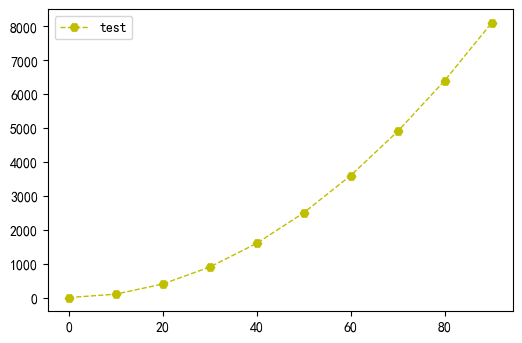

In [24]:
x= np.arange(0, 100,10)
y= x ** 2
"""linewidth 设置线条粗细
   label 设置线条标签
   color 设置线条颜色
   linestyle 设置线条形状
   marker 设置线条样点标记
"""
plt.plot(x, y, linewidth = '1', label = "test", color='y', linestyle='--', marker='H')
plt.rcParams['figure.figsize']=(8,3)
# plt.rcParams['figure.dpi']=300
plt.legend(loc='upper left')

# 练习:

- 1. 线条样点标记: 圆圈标记
- 2. 线条样式: 虚线
- 3. 线条颜色: 自选

### 2.线条样式缩写

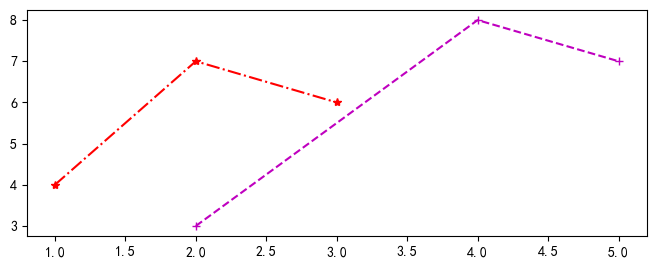

In [25]:
# 颜色 标记 样式
plt.plot([1,2,3],[4,7,6],'r*-.')
plt.plot([2,4,5],[3,8,7],'m+--')

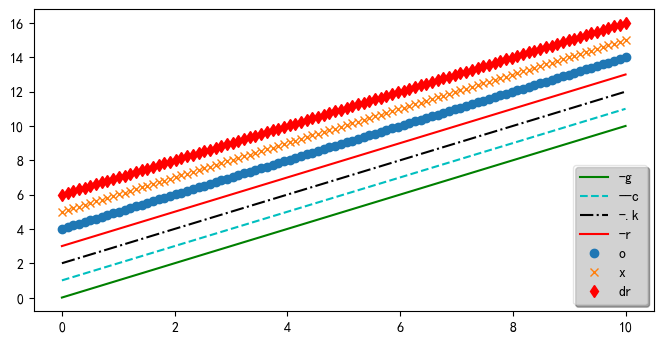

In [26]:
plt.rcParams['figure.figsize']=(8,4)
#不同种类不同颜色的线
#不同种类不同颜色的线并添加图例
x=np.linspace(0,10,100)

plt.plot(x,x+0, '-g', label='-g')    #实线  绿色

plt.plot(x,x+1, '--c', label='--c')   #虚线 浅蓝色

plt.plot(x,x+2, '-.k', label='-.k')   #点划线 黑色

plt.plot(x,x+3, '-r', label='-r')    #实线  红色

plt.plot(x,x+4, 'o', label='o')     #点   默认是蓝色

plt.plot(x,x+5, 'x', label='x')     #叉叉  默认是蓝色

plt.plot(x,x+6, 'dr', label='dr')    #砖石  红色

#添加图例右下角lower right  透明度  阴影  边框宽度
plt.legend(loc='lower right',framealpha=0.5,shadow=True, borderpad=0.5)

In [27]:
# 练习:

#之前的使用缩写形式呈现:




# 五.创建图形对象

在 Matplotlib 中，面向对象编程的核心思想是创建图形对象（figure object）。通过图形对象来调用其它的方法和属性，这样有助于我们更好地处理多个画布。在这个过程中，pyplot 负责生成图形对象，并通过该对象来添加一个或多个 axes 对象（即绘图区域）。

Matplotlib 提供了`matplotlib.figure`图形类模块，它包含了创建图形对象的方法。通过调用 pyplot 模块中 figure() 函数来实例化 figure 对象。



### 创建图形对象
figure方法如下：

`plt.figure(
    num=None,------------------------------------> 图像编号或名称，数字为编号 ，字符串为名称
    figsize=None,--------------------------------> 指定figure的宽和高，单位为英寸；
    dpi=None,------------------------------------> 定绘图对象的分辨率，即每英寸多少个像素，缺省值为72
    facecolor=None,------------------------------> 背景颜色
    edgecolor=None, -----------------------------> 边框颜色
    frameon=True, -------------------------------> 是否显示边框
    **kwargs,
)`

In [28]:
from matplotlib import pyplot as plt
# 创建图形对象,相当于我们创建一个画布
fig = plt.figure()

<Figure size 800x400 with 0 Axes>

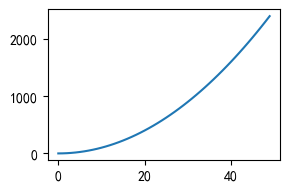

In [29]:
# 之前通过配置更改图形的分辨率和宽高. 如今可以再创建图像对象是创建

fig = plt.figure('f1',figsize=(3,2),dpi=100)
# plt.plot()
x = np.arange(0,50)
y = x ** 2
plt.plot(x,y)

[]

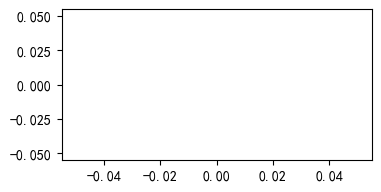

In [30]:
fig = plt.figure('f1',figsize=(4,2),dpi=100)
plt.plot()

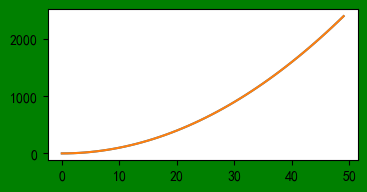

In [50]:
x = np.arange(0,50)
y = x ** 2
# 创建图形对象, 图形对象的分辨率为100,背景颜色为:灰色
fig = plt.figure('f1',figsize=(4,2), dpi=100,edgecolor='yellow',facecolor='green')
# 获取轴
ax = plt.gca()
ax.plot(x,y)
plt.plot(x,y)


# 六. 绘制多子图

figure是绘制对象(可理解为一个空白的画布)，一个figure对象可以包含多个Axes子图，一个Axes是一个绘图区域，不加设置时，Axes为1，且每次绘图其实都是在figure上的Axes上绘图。

接下来将学习绘制子图的几种方式:

- add_axes() : 添加区域
- subplot()  : 均等地划分画布,只是创建一个包含子图区域的画布,(返回区域对象)
- subplots() : 既创建了一个包含子图区域的画布，又创建了一个 figure 图形对象.(返回图形对象和区域对象)

### 1.add_axes() : 添加区域

Matplotlib 定义了一个 axes 类（轴域类），该类的对象被称为 axes 对象（即轴域对象），它指定了一个有数值范围限制的绘图区域。在一个给定的画布（figure）中可以包含多个 axes 对象，但是同一个 axes 对象只能在一个画布中使用。

> 2D 绘图区域（axes）包含两个轴（axis）对象

语法:

add_axes(rect)

- 该方法用来生成一个 axes 轴域对象，对象的位置由参数rect决定
- rect 是位置参数，接受一个由 4 个元素组成的浮点数列表，形如 [left, bottom, width, height] ，它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度。

如下所示：

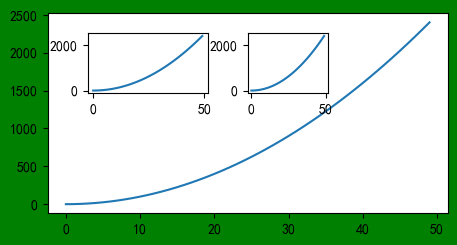

In [32]:
fig = plt.figure(figsize=(4,2),facecolor='g')

# ax1从画布起始位置绘制,宽高和画布一致
ax1=fig.add_axes([0,0,1,1])

# ax2 从画布 20% 的位置开始绘制, 宽高是画布的 50%
#ax2=fig.add_axes([0.2,0.2,0.5,0.5])
#ax2=fig.add_axes([0.5,0.5,0.5,0.5])
ax2=fig.add_axes([0.1,0.6,0.3,0.3])

ax3=fig.add_axes([0.5,0.6,0.2,0.3])
ax1.plot(x, y)
ax2.plot(x, y)
ax3.plot(x, y)

> 注意：每个元素的值是画布宽度和高度的分数。即将画布的宽、高作为 1 个单位。比如，[ 0.2, 0.2, 0.5, 0.5]，它代表着从画布 20% 的位置开始绘制, 宽高是画布的 50%

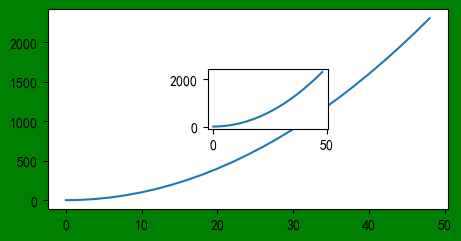

In [33]:
# 创建绘图对象
fig = plt.figure(figsize=(4,2),facecolor='g')

# 创建x坐标
x = np.arange(0,50,2)
# 创建y坐标
y = x ** 2
# 创建区域1,和画布位置一致
ax1 = fig.add_axes([0.0,0.0,1,1])

# 区域绘制图形
ax1.plot(x,y)

# 创建区域ax2 从画布 40% 的位置开始绘制, 宽高是画布的 50%
ax2=fig.add_axes([0.4,0.4,0.3,0.3])

# 区域2中绘制图形
ax2.plot(x,y)


### 练习:
修改上面代码,将区域2放到右下角.

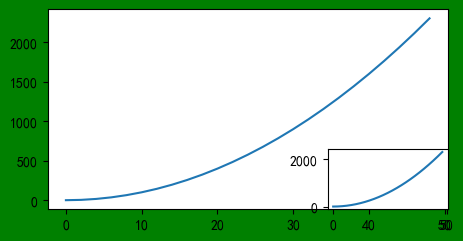

In [57]:
# 创建绘图对象
fig = plt.figure(figsize=(4,2),facecolor='g')

# 创建x坐标
x = np.arange(0,50,2)
# 创建y坐标
y = x ** 2
# 创建区域1,和画布位置一致
ax1 = fig.add_axes([0.0,0.0,1,1])

# 区域绘制图形
ax1.plot(x,y)

# 创建区域ax2 从画布 40% 的位置开始绘制, 宽高是画布的 50%
ax2=fig.add_axes([0.7,0,0.3,0.3])

# 区域2中绘制图形
ax2.plot(x,y)


### 区域中基本方法的使用

- 区域图表名称: set_title
- 区域中x轴和y轴名称:set_xlabel() set_ylabel()
- 刻度设置: set_xticks()
- 区域图表图例: legend()

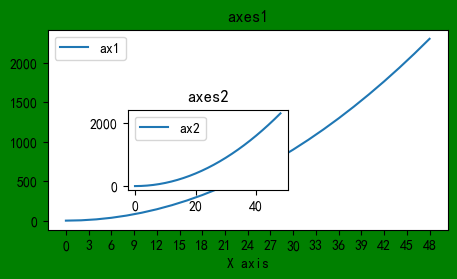

In [34]:
# 创建绘图对象
fig = plt.figure(figsize=(4,2),facecolor='g')

# 创建x坐标
x = np.arange(0,50,2)
# 创建y坐标
y = x ** 2
# 创建区域1,和画布位置一致
ax1 = fig.add_axes([0.0,0.0,1,1])
# 设置图表名称
ax1.set_title("axes1")
# x轴名称 
ax1.set_xlabel('X axis')

# 设置ax1横轴刻度
ax1.set_xticks(np.arange(0,50,3))

# 区域绘制图形
ax1.plot(x,y,label="ax1")
# 图例
ax1.legend()
# 创建区域ax2 从画布 40% 的位置开始绘制, 宽高是画布的 50%
ax2=fig.add_axes([0.2,0.2,0.4,0.4])
ax2.set_title("axes2")

# 区域2中绘制图形
ax2.plot(x,y,label='ax2')
# 图例,
ax2.legend()


# 练习:

- 1. 使用add_axes()方法,在一个图形对象中创建2个区域,分别画一个曲线和一个直线
- 2. 分别设置两个区域图形的名称和其他设置


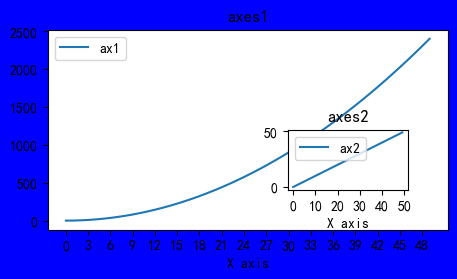

In [74]:
# 创建绘图对象
fig = plt.figure(figsize=(4,2),facecolor='b')

# 创建x坐标
x = np.arange(0,50)
y1=x**2
y2=x
# 创建区域1,和画布位置一致
ax1 = fig.add_axes([0.0,0.0,1,1])
# 设置图表名称
ax1.set_title("axes1")
# x轴名称
ax1.set_xlabel('X axis')
# 设置ax1横轴刻度
ax1.set_xticks(np.arange(0,50,3))

# 区域绘制图形
ax1.plot(x,y,label="ax1")
# 图例
ax1.legend()
# 创建区域2
ax2 = fig.add_axes([0.6,0.2,0.3,0.3])
# 设置图表名称
ax2.set_title("axes2")
# x轴名称
ax2.set_xlabel('X axis')
#设置ax2的X轴刻度
ax2.set_xticks(np.arange(-20,60,10))
ax2.plot(x,y2,label='ax2')
ax2.legend()

### 2.subplot() 函数，它可以均等地划分画布
参数格式如下：

ax = `plt.subplot(nrows, ncols, index,*args, **kwargs)`

- nrows 行
- ncols 列
- index: 索引
- kwargs: title/xlabel/ylabel 等.....

><font color="red">也可以直接将几个值写到一起,如:subplot(233)</font>

返回:`区域对象`

nrows 与 ncols 表示要划分几行几列的子区域（nrows*nclos表示子图数量），index 的初始值为1，用来选定具体的某个子区域。

例如： subplot(233)表示在当前画布的右上角创建一个两行三列的绘图区域（如下图所示），同时，选择在第 3 个位置绘制子图。

<img src="images/image-20220207234025887.png" style="300px">

>如果新建的子图与现有的子图重叠，那么重叠部分的子图将会被自动删除，因为它们不可以共享绘图区域。

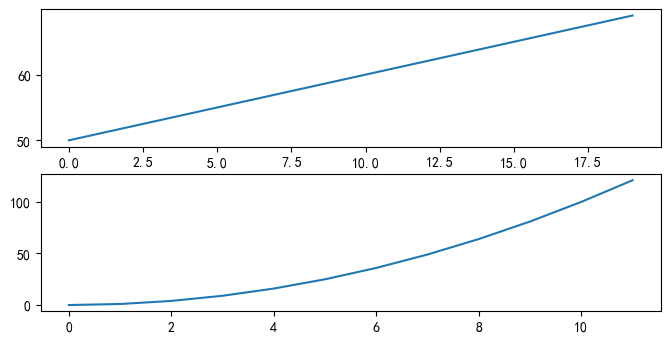

In [35]:
plt.plot([1,2,3])
#现在创建一个子图，它表示一个有1行2列的网格的顶部图。
#因为这个子图将与第一个重叠，所以之前创建的图将被删除
plt.subplot(211)
# x可省略,默认[0,1..,N-1]递增
plt.plot(range(50,70))

plt.subplot(212)

plt.plot(np.arange(12)**2)


### 如果不想覆盖之前的图,需要先创建画布,也就是

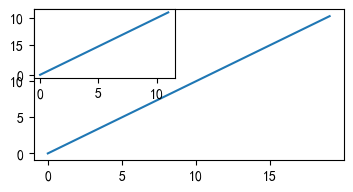

In [36]:
# 还可以先设置画布的大小,再通过画布创建区域
fig = plt.figure(figsize=(4,2))

fig.add_subplot(111)

plt.plot(range(20))

fig.add_subplot(221)

plt.plot(range(12))

### 设置多图的基本信息方式:

#### a. 在创建的时候直接设置:
- 对于subplot关键词赋值参数的了解,可以将光标移动到subplot方法上,使用快捷键shift+tab查看具体内容

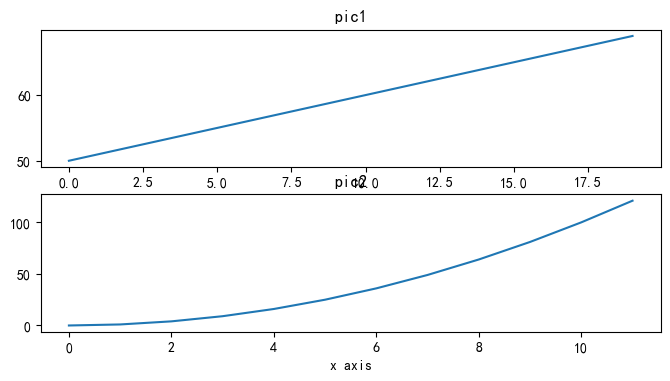

In [37]:
#现在创建一个子图，它表示一个有2行1列的网格的顶部图。
plt.subplot(211,title="pic1", xlabel="x axis")
# x可省略,默认[0,1..,N-1]递增
plt.plot(range(50,70))

plt.subplot(212, title="pic2", xlabel="x axis")

plt.plot(np.arange(12)**2)


> 发现子图标题重叠,在最后使用<font color="red">plt.tight_layout()</font>

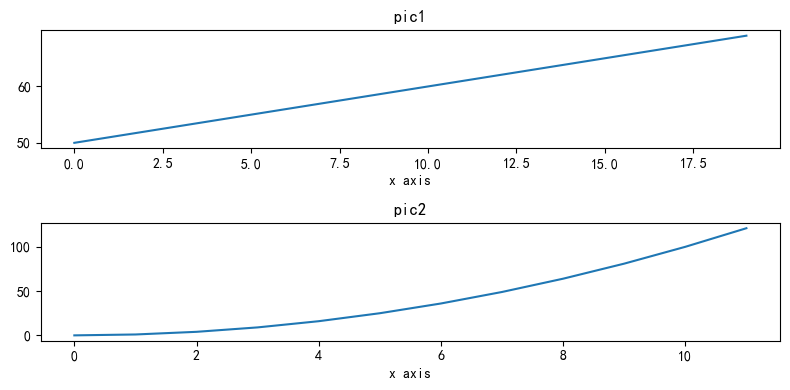

In [38]:
#现在创建一个子图，它表示一个有2行1列的网格的顶部图。
#--------------- 第一个区域---------------
plt.subplot(211,title="pic1", xlabel="x axis")
# x可省略,默认[0,1..,N-1]递增
plt.plot(range(50,70))

#--------------------第二区域-----------
plt.subplot(212, title="pic2", xlabel="x axis")

plt.plot(np.arange(12)**2)
# 紧凑的布局
plt.tight_layout()

#### b.使用pyplot模块中的方法设置后再绘制


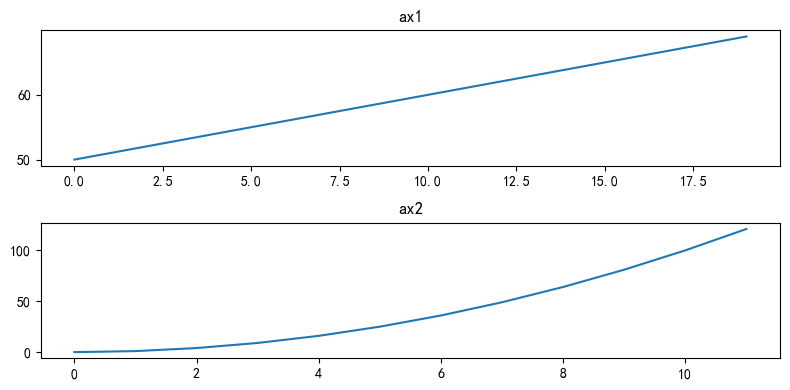

In [39]:
#现在创建一个子图，它表示一个有2行1列的网格的顶部图。

#--------------- 第一个区域---------------
plt.subplot(211)
# 使用图形对象:
plt.title("ax1")
# x可省略,默认[0,1..,N-1]递增
plt.plot(range(50,70))

#--------------------第二区域-----------
plt.subplot(212)
plt.title("ax2")

#...其他的自己设置

plt.plot(np.arange(12)**2)
# 紧凑的布局
plt.tight_layout()

### c.使用返回的区域对象设置.

> 注意区域对象的方法很多都是set_开头

- 使用区域对象将不存在 设置位置

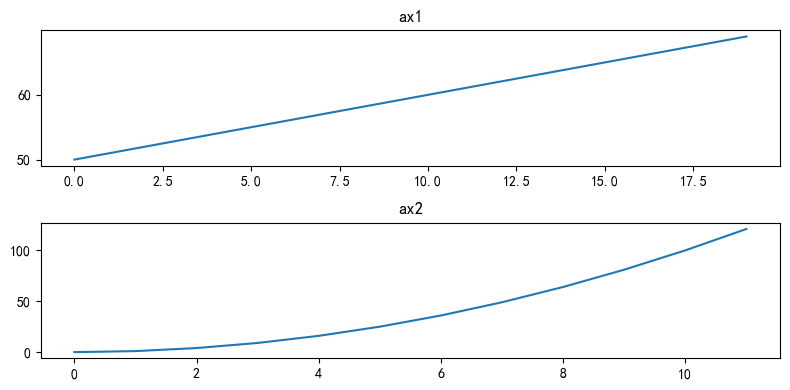

In [40]:
#现在创建一个子图，它表示一个有2行1列的网格的顶部图。

#--------------- 第一个区域 ax1---------------
ax1 = plt.subplot(211)
# 使用区域对象:
ax1.set_title("ax1")
# x可省略,默认[0,1..,N-1]递增
ax1.plot(range(50,70))

#--------------------第二区域 ax2-----------
ax2 = plt.subplot(212)
ax2.set_title("ax2")

#...其他的自己设置

ax2.plot(np.arange(12)**2)
# 紧凑的布局
plt.tight_layout()

### 3.subplots()函数详解

matplotlib.pyplot模块提供了一个 subplots() 函数，它的使用方法和 subplot() 函数类似。其不同之处在于，subplots() 既创建了一个包含子图区域的画布，又创建了一个 figure 图形对象，而 subplot() 只是创建一个包含子图区域的画布。

subplots 的函数格式如下：

`fig , ax = plt.subplots(nrows, ncols)`

- nrows 与 ncols 表示两个整数参数，它们指定子图所占的行数、列

函数的返回值是一个元组，包括一个图形对象和所有的 axes 对象。其中 axes 对象的数量等于 nrows * ncols，且每个 axes 对象均可通过索引值访问（从1开始）

### 下面我们创建了一个 2 行 2 列的子图，并在每个子图中显示 4 个不同的图像。

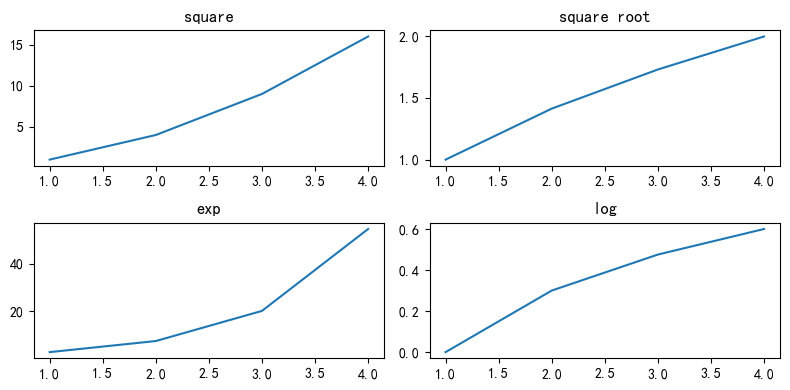

In [41]:
# 引入模块
import matplotlib.pyplot as plt
import numpy as np

# 创建2行2列的子图,返回图形对象(画布),所有子图的坐标轴
fig, axes =  plt.subplots(2,2)

x = np.arange(1,5)
#绘制平方函数
axes[0][0].plot(x, x*x)
axes[0][0].set_title('square')
#绘制平方根图像
axes[0][1].plot(x, np.sqrt(x))
axes[0][1].set_title('square root')
#绘制指数函数
axes[1][0].plot(x, np.exp(x))
axes[1][0].set_title('exp')

#绘制对数函数
axes[1][1].plot(x,np.log10(x))
axes[1][1].set_title('log')

# 处理标题遮挡
plt.tight_layout()

plt.show()

### 例2:
x轴为-50到50
y轴为x轴的平方

一个画布中绘制2个图.一个是正常图,一个是将纵向坐标向有移动一半距离,效果如下
<img src="images/image-20220319185321938.png" width="500px"/>

NameError: name 'a' is not defined

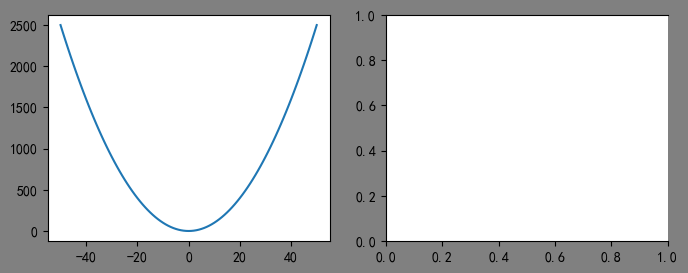

In [42]:
fig,axes =  plt.subplots(1,2)
# 设置画布的高和宽, 注意:只为英寸 ,默认分别率为72
fig.set_figheight(3) # 实际高度为 73*3 像素
fig.set_figwidth(8) # 实际宽度为 73*8 像素
# 设置背景:
fig.set_facecolor('gray')
# 分别定义x y
x = np.arange(-50,51)
y = x ** 2

#--------------------绘制图形1 -----------
axes[0].plot(x, y)

# ------------处理图形2的绘制----------------
# 不需要右侧和上侧线条,则可以设置他的颜色
axes[1].spines['right'].set_color("none")
a[1].spines['top'].set_color("none")
# 移动下轴到指定位置
# 在这里，position位置参数有三种，data , outward(向外-可自行尝试) , axes
# axes:0.0 - 1.0之间的值，整个轴上的比例
a[1].spines['left'].set_position(('axes',0.5))

# 移动下轴到指定位置
# 'data'表示按数值挪动，其后数字代表挪动到Y轴的刻度值
a[1].spines['bottom'].set_position(('data',0.0))

a[1].plot(x, y)

可以看到top和right边被隐藏了

# 绘制一个特殊的图形,如:

一共划分了2X2=4个区域，然后1234分别开始绘图, 

<img src="images/image-20220319203805039.png" style="width:400px">

In [ ]:
# 一共划分了2X2=4个区域，到第三个区域时绘制2X1,移动到第二个图
